In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies_data = pd.read_csv('/content/drive/MyDrive/Python1/Projects/Movie_Recommendation_System/movies.csv')
ratings_data = pd.read_csv('/content/drive/MyDrive/Python1/Projects/Movie_Recommendation_System/ratings.csv')

In [ ]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [ ]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [ ]:
# Unique users and movies
unique_users = ratings_data['userId'].nunique()
unique_movies = movies_data['movieId'].nunique()

print(f'Unique Users: {unique_users}, Unique Movies: {unique_movies}')

Unique Users: 668, Unique Movies: 10329


In [ ]:
# Avergae ratings
average_rating = ratings_data['rating'].mean()
print(f'Average Rating: {average_rating}')

Average Rating: 3.5168503593161127


In [ ]:
# Total movies at genre level
movies_data['genres'] = movies_data['genres'].str.split('|')
all_genres = set(g for genres in movies_data['genres'] for g in genres)

print(f'Unique genres: {all_genres}')

Unique genres: {'Animation', 'Fantasy', 'IMAX', 'Drama', 'Mystery', 'Comedy', 'Action', 'Western', 'Horror', '(no genres listed)', 'Children', 'Musical', 'Adventure', 'Documentary', 'Film-Noir', 'Crime', 'Romance', 'Thriller', 'Sci-Fi', 'War'}


In [ ]:
# Create a dataframe with the number of movies per genre
genre_counts = {genre: 0 for genre in all_genres}
for genres in movies_data['genres']:
  for genre in genres:
    genre_counts[genre] += 1

genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
print(genre_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True))

                 Genre  Count
0                Drama   5220
1               Comedy   3515
2             Thriller   2187
3              Romance   1788
4               Action   1737
5                Crime   1440
6            Adventure   1164
7               Horror   1001
8               Sci-Fi    860
9              Mystery    675
10             Fantasy    670
11            Children    540
12                 War    503
13         Documentary    415
14             Musical    409
15           Animation    401
16             Western    235
17           Film-Noir    195
18                IMAX    152
19  (no genres listed)      7


<ipython-input-12-d41888a39878>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_counts_df.sort_values(by='Count', ascending=False), palette='bright')


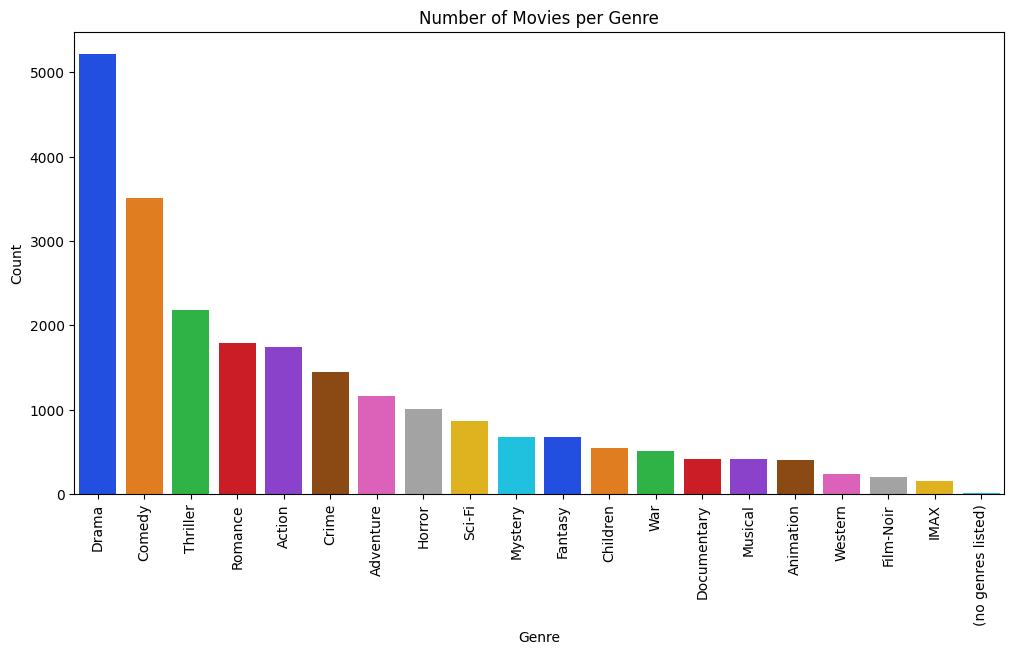

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=genre_counts_df.sort_values(by='Count', ascending=False), palette='bright')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Number of Movies per Genre')
plt.show()

# ***Popularity_Based_Recommendation***
**It recommends top movies based on average ratings.**

In [ ]:
def popularity_based_recommendation(genre, min_reviews, num_recommendations):
  genre_movies = movies_data[movies_data['genres'].apply(lambda x: genre in x)]
  genre_movies = genre_movies.merge(ratings_data, on='movieId')
  movie_status = genre_movies.groupby('title').agg({'rating': ['mean', 'count']})
  movie_status.columns = ['average_rating', 'number_of_reviews']
  popular_movies = movie_status[movie_status['number_of_reviews'] >= min_reviews]
  popular_movies = popular_movies.sort_values('average_rating', ascending=False)
  popular_movies = popular_movies.head(num_recommendations).reset_index()

  return popular_movies[['title', 'average_rating', 'number_of_reviews']]

popularity_data = popularity_based_recommendation('Comedy', 100, 5)
print(popularity_data)

                                    title  average_rating  number_of_reviews
0  Monty Python and the Holy Grail (1975)        4.301948                154
1                            Fargo (1996)        4.271144                201
2              Princess Bride, The (1987)        4.163743                171
3                     Pulp Fiction (1994)        4.160000                325
4                     Forrest Gump (1994)        4.138264                311


<ipython-input-14-5c6184211f29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='title', data=popularity_data, palette='viridis')


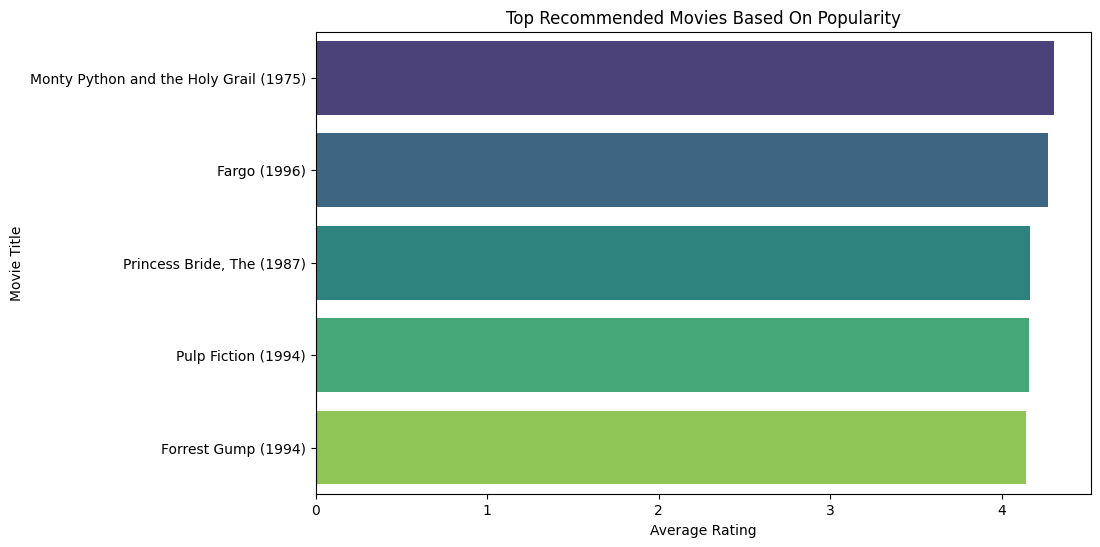

In [ ]:
def plot_popularity_based_recommendation(popularity_data):
  plt.figure(figsize=(10, 6))
  sns.barplot(x='average_rating', y='title', data=popularity_data, palette='viridis')
  plt.xlabel('Average Rating')
  plt.ylabel('Movie Title')
  plt.title('Top Recommended Movies Based On Popularity')
  plt.show()

plot_popularity_based_recommendation(popularity_data)

# ***Content_Based_Recommendation***
**It recommends top movies based on similar genres.**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def content_based_recommendation(movie_title, num_recommendations):
  movies_data['genre_str'] = movies_data['genres'].apply(lambda x: ' '.join(x))
  count_vectorizer = CountVectorizer()
  count_matrix = count_vectorizer.fit_transform(movies_data['genre_str'])
  cosine_sim = cosine_similarity(count_matrix, count_matrix)
  movie_idx = movies_data[movies_data['title'] == movie_title].index[0]
  sim_scores = list(enumerate(cosine_sim[movie_idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]
  content = movies_data.iloc[movie_indices]['title'].reset_index(drop=True)
  content_based_data = pd.DataFrame({'Movie Title': content})

  return content_based_data

content_based_data = content_based_recommendation('Toy Story (1995)', 10)
print(content_based_data)

                                         Movie Title
0                                        Antz (1998)
1                                 Toy Story 2 (1999)
2     Adventures of Rocky and Bullwinkle, The (2000)
3                   Emperor's New Groove, The (2000)
4                              Monsters, Inc. (2001)
5  DuckTales: The Movie - Treasure of the Lost La...
6                                   Wild, The (2006)
7                             Shrek the Third (2007)
8                     Tale of Despereaux, The (2008)
9  Asterix and the Vikings (Astérix et les Viking...


<ipython-input-17-e8cd66ce4b2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=content_based_data['Movie Title'], x=content_based_data.index.sort_values(ascending=False), data=content_based_data, palette='magma')


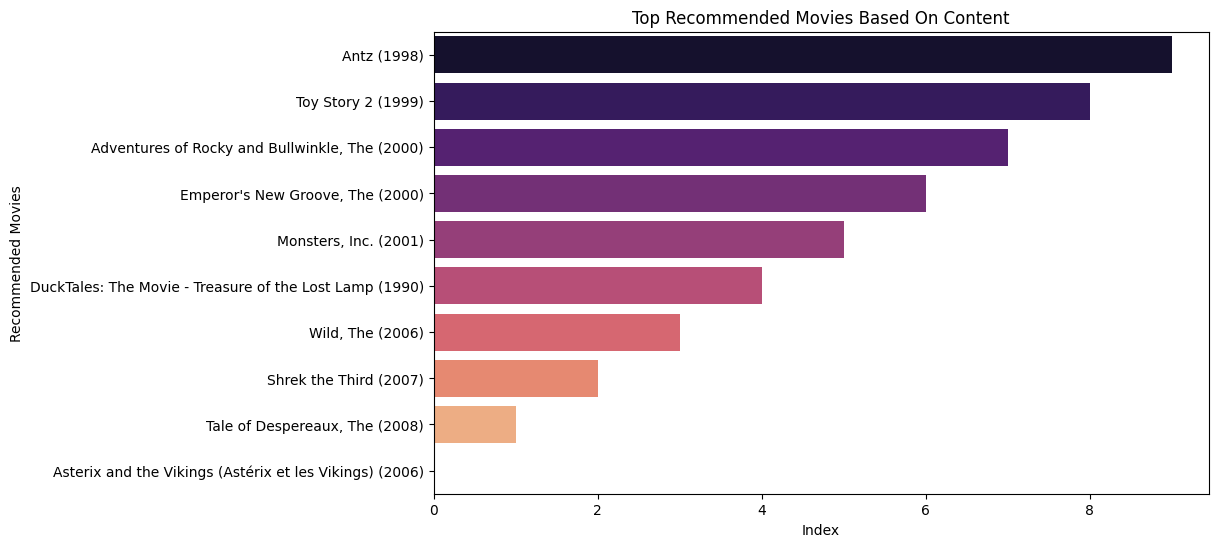

In [ ]:
def plot_content_based_recommendation(content_based_data):
  plt.figure(figsize=(10, 6))
  sns.barplot(y=content_based_data['Movie Title'], x=content_based_data.index.sort_values(ascending=False), data=content_based_data, palette='magma')
  plt.xlabel('Index')
  plt.ylabel('Recommended Movies')
  plt.title('Top Recommended Movies Based On Content')
  plt.show()

plot_content_based_recommendation(content_based_data)

# ***Collaborative_Based_Recommendation***
**It recommends top movies based on similar users.**

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
def collaborative_based_recommendation(user_id, num_recommendations, num_neighbors):
  user_movie_ratings = ratings_data.pivot(index='userId', columns='movieId', values='rating')
  user_movie_ratings = user_movie_ratings.fillna(0)
  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(user_movie_ratings)
  distances, indices = knn.kneighbors(user_movie_ratings.loc[user_id].values.reshape(1, -1), n_neighbors=num_neighbors + 1)
  similar_users = indices.flatten()[1:]
  similar_users_ratings = user_movie_ratings.iloc[similar_users]
  similar_users_ratings = similar_users_ratings.mean(axis=0)
  recommended_movies = similar_users_ratings.sort_values(ascending=False).head(num_recommendations)
  collaborative_data = movies_data[movies_data['movieId'].isin(recommended_movies.index)]['title'].reset_index(drop=True)
  collaborative_data = pd.DataFrame({'Movie Title': collaborative_data})

  return collaborative_data

collaborative_based_data = collaborative_based_recommendation(1, 5, 100)
print(collaborative_based_data)

                                         Movie Title
0                                Pulp Fiction (1994)
1                   Shawshank Redemption, The (1994)
2                                Forrest Gump (1994)
3  Star Wars: Episode V - The Empire Strikes Back...
4                                 Matrix, The (1999)


<ipython-input-20-e968e22482ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=collaborative_based_data.index.sort_values(ascending=False), y='Movie Title', data=collaborative_based_data, palette='cubehelix')


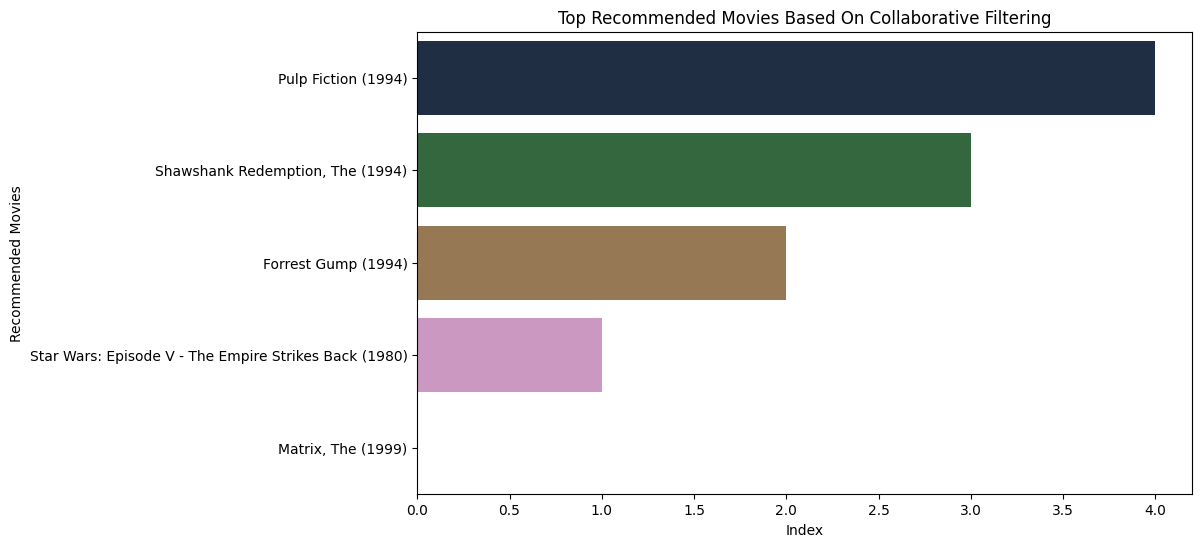

In [ ]:
def plot_collaborative_based_recommendation(collaborative_based_data):
  plt.figure(figsize=(10, 6))
  sns.barplot(x=collaborative_based_data.index.sort_values(ascending=False), y='Movie Title', data=collaborative_based_data, palette='cubehelix')
  plt.xlabel('Index')
  plt.ylabel('Recommended Movies')
  plt.title('Top Recommended Movies Based On Collaborative Filtering')
  plt.show()

plot_collaborative_based_recommendation(collaborative_based_data)